In [1]:
from pathlib import Path

import numpy as np
import xarray as xr
import scipy.constants as sp_c
import xarray_sentinel as xr_s
import matplotlib.pyplot as plt

import drama.geo.geometry as d_geo
import drama.constants as d_c

In [2]:
path_slc = Path(
    "/home/andreas/S1 Data/S1A_IW_GRDH_1SDV_20231117T172418_20231117T172443_051260_062F14_8E05/S1A_IW_SLC__1SDV_20231117T172416_20231117T172443_051260_062F14_AD40.SAFE"
)
path_annotation = Path(
    "~/S1 Data/S1A_IW_GRDH_1SDV_20231117T172418_20231117T172443_051260_062F14_8E05/S1A_IW_SLC__1SDV_20231117T172416_20231117T172443_051260_062F14_AD40.SAFE/annotation/s1a-iw1-slc-vv-20231117t172417-20231117t172442-051260-062f14-004.xml"
).expanduser()
path_grd = (
    path_slc.parent
    / "S1A_IW_GRDH_1SDV_20231117T172418_20231117T172443_051260_062F14_8E05.SAFE"
)

In [3]:
orbit = xr_s.sentinel1.open_orbit_dataset(path_annotation)

/tmp/ipykernel_183222/2696795894.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  orbit = xr_s.sentinel1.open_orbit_dataset(path_annotation)


In [4]:
slc_iw1_vv = xr.open_dataset(path_slc, group="IW1/VV", engine="sentinel-1")
slc_iw1_vv_cal = xr.open_dataset(
    path_slc, group="IW1/VV/calibration", engine="sentinel-1"
)
slc_iw1_vv

/tmp/ipykernel_183222/3362048981.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  slc_iw1_vv = xr.open_dataset(path_slc, group="IW1/VV", engine="sentinel-1")
/tmp/ipykernel_183222/3362048981.py:2: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced 

<xarray.Dataset>
Dimensions:           (pixel: 22541, line: 13500)
Coordinates:
  * pixel             (pixel) int64 0 1 2 3 4 ... 22536 22537 22538 22539 22540
  * line              (line) int64 0 1 2 3 4 5 ... 13495 13496 13497 13498 13499
    azimuth_time      (line) datetime64[ns] ...
    slant_range_time  (pixel) float64 ...
Data variables:
    measurement       (line, pixel) complex64 ...
Attributes: (12/34)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    geospatial_lon_min:                  4.910295135888662
    geospatial_lon_max:                  6.595963929007517
    group:                               /IW1/VV
    subgroups:                           ['orbit', 'attitude', 'azimuth_fm_ra...
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5

In [5]:
slc_iw1_vv_cal

<xarray.Dataset>
Dimensions:       (line: 29, pixel: 565)
Coordinates:
  * line          (line) int64 -573 70 557 1043 1689 ... 13012 13657 14143 14630
  * pixel         (pixel) int64 0 40 80 120 160 ... 22440 22480 22520 22540
Data variables:
    azimuth_time  (line) datetime64[ns] ...
    sigmaNought   (line, pixel) float32 ...
    betaNought    (line, pixel) float32 ...
    gamma         (line, pixel) float32 ...
    dn            (line, pixel) float32 ...
Attributes: (12/17)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    stop_time:                           2023-11-17T17:24:43.963956
    group:                               /IW1/VV/calibration
    Conventions:                         CF-1.8
    title:                               Calibration coefficients
    comment:                             The dataset contains calibration inf...
    history:                             created by xarray_sentinel-0.9.5

In [6]:
# sigma0_iw1_vv = xr_s.calibrate_intensity(slc_iw1_vv.measurement, slc_iw1_vv_cal.sigmaNought, as_db=True, min_db=-30)

In [7]:
# sigma0_iw1_vv

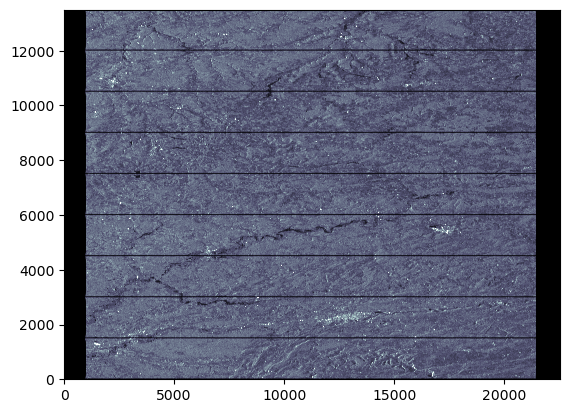

In [8]:
fig, ax = plt.subplots()
ax.imshow(np.abs(slc_iw1_vv.measurement), vmax=250, cmap="bone", origin="lower", aspect="auto")

In [9]:
# fig, ax = plt.subplots()
# ax.imshow(sigma0_iw1_vv, cmap="bone", vmin=-20, vmax=-1)

In [10]:
slc_iw1_vv

<xarray.Dataset>
Dimensions:           (pixel: 22541, line: 13500)
Coordinates:
  * pixel             (pixel) int64 0 1 2 3 4 ... 22536 22537 22538 22539 22540
  * line              (line) int64 0 1 2 3 4 5 ... 13495 13496 13497 13498 13499
    azimuth_time      (line) datetime64[ns] ...
    slant_range_time  (pixel) float64 ...
Data variables:
    measurement       (line, pixel) complex64 ...
Attributes: (12/34)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    geospatial_lon_min:                  4.910295135888662
    geospatial_lon_max:                  6.595963929007517
    group:                               /IW1/VV
    subgroups:                           ['orbit', 'attitude', 'azimuth_fm_ra...
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5

In [11]:
slc_iw1_vv_0 = xr_s.crop_burst_dataset(slc_iw1_vv, 0)
slc_iw1_vv_0

<xarray.Dataset>
Dimensions:           (slant_range_time: 22541, azimuth_time: 1500)
Coordinates:
    pixel             (slant_range_time) int64 0 1 2 3 ... 22538 22539 22540
    line              (azimuth_time) int64 0 1 2 3 4 ... 1496 1497 1498 1499
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:17.85222...
  * slant_range_time  (slant_range_time) float64 0.005337 0.005337 ... 0.005687
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW1/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    765.994307
    burst_index:                         0
    burst_id:                            187148

In [12]:
# slc_iw1_vv_0.azimuth_time

In [13]:
# slc_iw1_vv_0.azimuth_time.min(), slc_iw1_vv_0.azimuth_time.max()

In [14]:
mosaic = xr_s.mosaic_slc_iw(slc_iw1_vv)

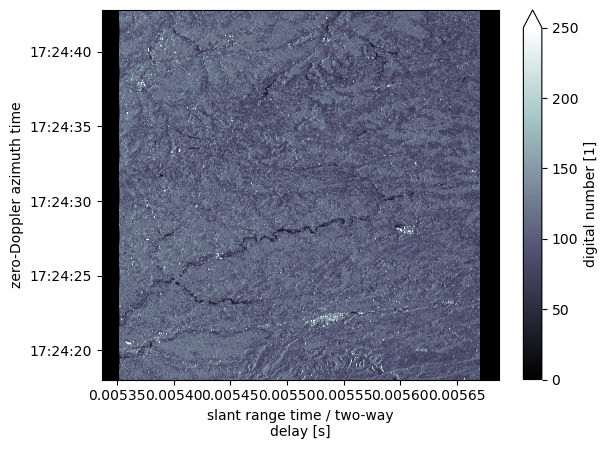

In [15]:
np.abs(mosaic.measurement).plot.imshow(origin="lower", interpolation="antialiased", cmap="bone", vmin=0, vmax=250)

In [16]:
slc_iw1_vv_1 = xr_s.crop_burst_dataset(slc_iw1_vv, 1)
slc_iw1_vv_1

<xarray.Dataset>
Dimensions:           (slant_range_time: 22541, azimuth_time: 1500)
Coordinates:
    pixel             (slant_range_time) int64 0 1 2 3 ... 22538 22539 22540
    line              (azimuth_time) int64 1500 1501 1502 ... 2997 2998 2999
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:20.60872...
  * slant_range_time  (slant_range_time) float64 0.005337 0.005337 ... 0.005687
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW1/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    768.750808
    burst_index:                         1
    burst_id:                            187149

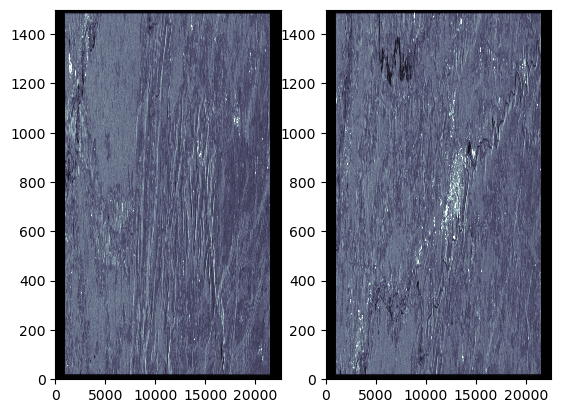

In [17]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(
    np.abs(slc_iw1_vv_0.measurement),
    vmax=250,
    cmap="bone",
    aspect="auto",
    origin="lower"
)
axs[1].imshow(
    np.abs(slc_iw1_vv_1.measurement),
    vmax=250,
    cmap="bone",
    aspect="auto",
    origin="lower"
)

In [18]:
slc_iw1_vv.isel(line=1499).azimuth_time.load()

<xarray.DataArray 'azimuth_time' ()>
array('2023-11-17T17:24:20.933502444', dtype='datetime64[ns]')
Coordinates:
    line          int64 1499
    azimuth_time  datetime64[ns] 2023-11-17T17:24:20.933502444
Attributes:
    long_name:      zero-Doppler azimuth time
    standard_name:  time

In [19]:
slc_iw1_vv.isel(line=1500).azimuth_time.load()

<xarray.DataArray 'azimuth_time' ()>
array('2023-11-17T17:24:20.608725000', dtype='datetime64[ns]')
Coordinates:
    line          int64 1500
    azimuth_time  datetime64[ns] 2023-11-17T17:24:20.608725
Attributes:
    long_name:      zero-Doppler azimuth time
    standard_name:  time

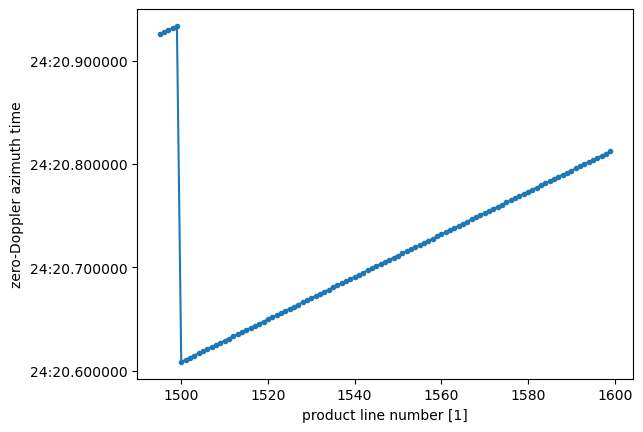

In [20]:
slc_iw1_vv.isel(line=slice(1495, 1600)).azimuth_time.plot(marker=".")

In [21]:
slc_iw1_vv_1.azimuth_time.min(), slc_iw1_vv_1.azimuth_time.max()

(<xarray.DataArray 'azimuth_time' ()>
 array('2023-11-17T17:24:20.608725000', dtype='datetime64[ns]'),
 <xarray.DataArray 'azimuth_time' ()>
 array('2023-11-17T17:24:23.690003444', dtype='datetime64[ns]'))

In [22]:
slc_iw1_vv_0.azimuth_time.min(), slc_iw1_vv_0.azimuth_time.max()

(<xarray.DataArray 'azimuth_time' ()>
 array('2023-11-17T17:24:17.852224000', dtype='datetime64[ns]'),
 <xarray.DataArray 'azimuth_time' ()>
 array('2023-11-17T17:24:20.933502444', dtype='datetime64[ns]'))

In [23]:
one_second = np.timedelta64(1000000000, "ns")

In [24]:
(slc_iw1_vv_1.azimuth_time.max() - slc_iw1_vv_1.azimuth_time.min()) / one_second

<xarray.DataArray 'azimuth_time' ()>
array(3.08127844)

In [25]:
arg_min_i  = np.abs((slc_iw1_vv_0.azimuth_time.max() - slc_iw1_vv_1.azimuth_time) / one_second).argmin()

In [26]:
overlap = (slc_iw1_vv_0.azimuth_time.max() - slc_iw1_vv_1.azimuth_time.min()) / one_second
overlap

<xarray.DataArray 'azimuth_time' ()>
array(0.32477744)

In [27]:
# slc_iw1_vv_0.isel(azimuth_time=slice(90, -90)).azimuth_time.min(), slc_iw1_vv_0.isel(azimuth_time=slice(90, -90)).azimuth_time.max()

In [28]:
# slc_iw1_vv_1.isel(azimuth_time=slice(90, -90)).azimuth_time.min(), slc_iw1_vv_1.isel(azimuth_time=slice(90, -90)).azimuth_time.max()

In [29]:
slc_iw2_vv = xr.open_dataset(path_slc, group="IW2/VV", engine="sentinel-1")
slc_iw2_vv

/tmp/ipykernel_183222/2344761700.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  slc_iw2_vv = xr.open_dataset(path_slc, group="IW2/VV", engine="sentinel-1")


<xarray.Dataset>
Dimensions:           (pixel: 26345, line: 13599)
Coordinates:
  * pixel             (pixel) int64 0 1 2 3 4 ... 26340 26341 26342 26343 26344
  * line              (line) int64 0 1 2 3 4 5 ... 13594 13595 13596 13597 13598
    azimuth_time      (line) datetime64[ns] ...
    slant_range_time  (pixel) float64 ...
Data variables:
    measurement       (line, pixel) complex64 ...
Attributes: (12/34)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    geospatial_lon_min:                  6.023131023591562
    geospatial_lon_max:                  7.706942050447679
    group:                               /IW2/VV
    subgroups:                           ['orbit', 'attitude', 'azimuth_fm_ra...
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5

In [30]:
(np.diff(slc_iw1_vv_0.azimuth_time) / one_second) * 7500

array([15.41667, 15.41667, 15.41667, ..., 15.41667, 15.41667, 15.41667])

In [31]:
slc_iw2_vv_0 = xr_s.crop_burst_dataset(slc_iw2_vv, 0)
slc_iw2_vv_0

<xarray.Dataset>
Dimensions:           (slant_range_time: 26345, azimuth_time: 1511)
Coordinates:
    pixel             (slant_range_time) int64 0 1 2 3 ... 26342 26343 26344
    line              (azimuth_time) int64 0 1 2 3 4 ... 1507 1508 1509 1510
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:18.79366...
  * slant_range_time  (slant_range_time) float64 0.005646 0.005646 ... 0.006056
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW2/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    766.935752
    burst_index:                         0
    burst_id:                            187148

In [32]:
slc_iw1_vv_0.azimuth_time

<xarray.DataArray 'azimuth_time' (azimuth_time: 1500)>
array(['2023-11-17T17:24:17.852224000', '2023-11-17T17:24:17.854279556',
       '2023-11-17T17:24:17.856335112', ..., '2023-11-17T17:24:20.929391332',
       '2023-11-17T17:24:20.931446888', '2023-11-17T17:24:20.933502444'],
      dtype='datetime64[ns]')
Coordinates:
    line          (azimuth_time) int64 0 1 2 3 4 5 ... 1495 1496 1497 1498 1499
  * azimuth_time  (azimuth_time) datetime64[ns] 2023-11-17T17:24:17.852224 .....
Attributes:
    long_name:      zero-Doppler azimuth time
    standard_name:  time

In [33]:
(slc_iw2_vv_0.azimuth_time.max() - slc_iw2_vv_0.azimuth_time.min()) / one_second

<xarray.DataArray 'azimuth_time' ()>
array(3.10388956)

In [34]:
(slc_iw2_vv_0.azimuth_time[0] - slc_iw1_vv_0.azimuth_time[0]) / one_second

<xarray.DataArray 'azimuth_time' ()>
array(0.941445)
Coordinates:
    line     int64 0

In [35]:
slc_iw3_vv = xr.open_dataset(path_slc, group="IW3/VV", engine="sentinel-1")
slc_iw3_vv

/tmp/ipykernel_183222/562931225.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  slc_iw3_vv = xr.open_dataset(path_slc, group="IW3/VV", engine="sentinel-1")


<xarray.Dataset>
Dimensions:           (pixel: 25352, line: 13644)
Coordinates:
  * pixel             (pixel) int64 0 1 2 3 4 ... 25347 25348 25349 25350 25351
  * line              (line) int64 0 1 2 3 4 5 ... 13639 13640 13641 13642 13643
    azimuth_time      (line) datetime64[ns] ...
    slant_range_time  (pixel) float64 ...
Data variables:
    measurement       (line, pixel) complex64 ...
Attributes: (12/34)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    geospatial_lon_min:                  7.241833717294598
    geospatial_lon_max:                  8.732861606105345
    group:                               /IW3/VV
    subgroups:                           ['orbit', 'attitude', 'azimuth_fm_ra...
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5

In [36]:
slc_iw3_vv_0 = xr_s.crop_burst_dataset(slc_iw3_vv, 0)
slc_iw3_vv_0

<xarray.Dataset>
Dimensions:           (slant_range_time: 25352, azimuth_time: 1516)
Coordinates:
    pixel             (slant_range_time) int64 0 1 2 3 ... 25349 25350 25351
    line              (azimuth_time) int64 0 1 2 3 4 ... 1512 1513 1514 1515
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:16.99711...
  * slant_range_time  (slant_range_time) float64 0.006017 0.006017 ... 0.006411
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW3/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    765.139195
    burst_index:                         0
    burst_id:                            187147

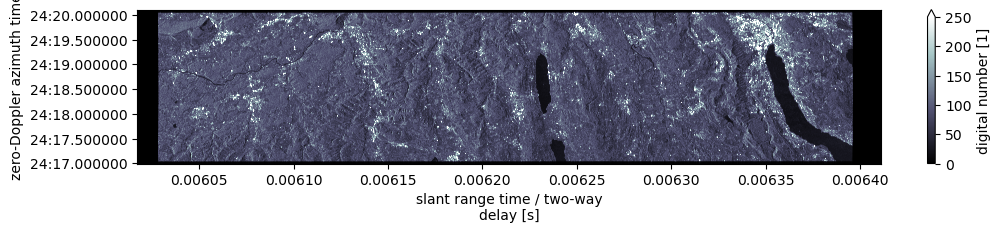

In [37]:
np.abs(slc_iw3_vv_0.measurement).plot.imshow(
    size=2,
    aspect=6,
    vmin=0,
    vmax=250,
    cmap="bone",
    interpolation="antialiased",
    origin="lower",
)

In [38]:
(slc_iw3_vv_0.azimuth_time.isel(azimuth_time=0) - slc_iw2_vv_0.azimuth_time.isel(azimuth_time=0)) / one_second

<xarray.DataArray 'azimuth_time' ()>
array(-1.796557)
Coordinates:
    line     int64 0

In [39]:
slc_iw3_vv_0.azimuth_time.isel(azimuth_time=0)

<xarray.DataArray 'azimuth_time' ()>
array('2023-11-17T17:24:16.997112000', dtype='datetime64[ns]')
Coordinates:
    line          int64 0
    azimuth_time  datetime64[ns] 2023-11-17T17:24:16.997112
Attributes:
    long_name:      zero-Doppler azimuth time
    standard_name:  time

In [40]:
slc_iw2_vv_0.azimuth_time.isel(azimuth_time=0)

<xarray.DataArray 'azimuth_time' ()>
array('2023-11-17T17:24:18.793669000', dtype='datetime64[ns]')
Coordinates:
    line          int64 0
    azimuth_time  datetime64[ns] 2023-11-17T17:24:18.793669
Attributes:
    long_name:      zero-Doppler azimuth time
    standard_name:  time

In [41]:
(np.diff(slc_iw2_vv_0.azimuth_time) / one_second)

array([0.00205556, 0.00205556, 0.00205556, ..., 0.00205556, 0.00205556,
       0.00205556])

In [42]:
(np.diff(slc_iw1_vv_0.azimuth_time) / one_second)

array([0.00205556, 0.00205556, 0.00205556, ..., 0.00205556, 0.00205556,
       0.00205556])

In [43]:
slant_range_m = slc_iw1_vv_0.slant_range_time * sp_c.c / 2

In [44]:
orbit_distance = np.linalg.norm(
    orbit.position.interp(azimuth_time=slc_iw1_vv.azimuth_time, method="cubic"), axis=0
)

In [45]:
orbit_altitude = orbit_distance - d_c.r_earth

In [46]:
q_geo = d_geo.QuickRadarGeometry(orbit_altitude[0])
np.diff(q_geo.sr_to_gr(slant_range_m))

array([4.38928706, 4.38928706, 4.38928706, ..., 3.78049689, 3.78049689,
       3.78049689])

In [47]:
np.rad2deg(q_geo.sr_to_inc(slant_range_m))

array([32.00724832, 32.00755409, 32.00785985, ..., 38.02205041,
       38.02228446, 38.02251851])

In [48]:
q_geo.inc_to_gr(np.deg2rad(29))

340727.1672409251

In [49]:
# slc_iw1_vv = slc_iw1_vv.swap_dims({"line": "azimuth_time", "pixel": "slant_range_time"})
# slc_iw2_vv = slc_iw2_vv.swap_dims({"line": "azimuth_time", "pixel": "slant_range_time"})

In [50]:
# slc_iw1_vv, slc_iw2_vv = xr.align(
#     slc_iw1_vv.isel(slant_range_time=slice(-100, None), azimuth_time=slice(500, 600)),
#     slc_iw2_vv.isel(slant_range_time=slice(0, 100), azimuth_time=slice(0, 100)),
#     join="outer",
#     fill_value=np.nan,
# )

In [51]:
slc_iw12_m = xr.concat(
    [slc_iw1_vv, slc_iw2_vv],
    dim="pixel",
    # data_vars="minimal",
    coords="minimal",
    join="outer",
    compat="override",
)

In [52]:
conversion_ds = xr_s.sentinel1.open_coordinate_conversion_dataset(
    path_grd
    / "annotation"
    / "s1a-iw-grd-vv-20231117t172418-20231117t172443-051260-062f14-001.xml"
)

/tmp/ipykernel_183222/1536984045.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  conversion_ds = xr_s.sentinel1.open_coordinate_conversion_dataset(


In [53]:
grg_iw1_0 = xr_s.sentinel1.slant_range_time_to_ground_range(
    slc_iw1_vv_0.azimuth_time, slc_iw1_vv_0.slant_range_time, conversion_ds
)

In [54]:
az_iw1_0 = (
    (slc_iw1_vv_0.azimuth_time - slc_iw1_vv_0.azimuth_time[0]) / one_second * 7500
)

In [55]:
az_iw1_0

<xarray.DataArray 'azimuth_time' (azimuth_time: 1500)>
array([0.00000000e+00, 1.54166700e+01, 3.08333400e+01, ...,
       2.30787550e+04, 2.30941717e+04, 2.31095883e+04])
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 2023-11-17T17:24:17.852224 .....

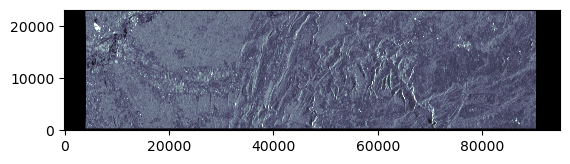

In [51]:
fig, ax = plt.subplots()
ax.imshow(
    np.abs(slc_iw1_vv_0.measurement),
    vmax=250,
    cmap="bone",
    origin="lower",
    extent=[grg_iw1_0.min(), grg_iw1_0.max(), az_iw1_0.min(), az_iw1_0.max()],
    interpolation="antialiased",
)
# ax.imshow(np.abs(slc_iw2_vv_0.measurement), vmax=250, cmap="bone")

In [52]:
grg_iw1_0.shape

(1500, 22541)

In [53]:
slc_iw1_vv_0.slant_range_time.shape[0] / slc_iw1_vv_0.azimuth_time.shape[0]

15.027333333333333

In [54]:
grg_iw1_0.shape

(1500, 22541)

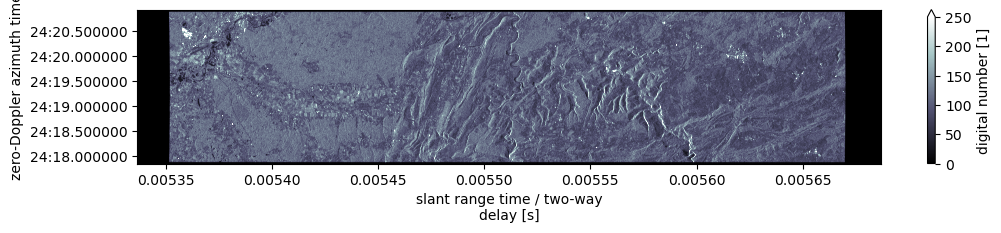

In [55]:
np.abs(slc_iw1_vv_0.measurement).plot.imshow(
    size=2,
    aspect=6,
    vmin=0,
    vmax=250,
    cmap="bone",
    interpolation="antialiased",
    origin="lower",
)

In [56]:
slc_iw1_vv_0

<xarray.Dataset>
Dimensions:           (slant_range_time: 22541, azimuth_time: 1500)
Coordinates:
    pixel             (slant_range_time) int64 0 1 2 3 ... 22538 22539 22540
    line              (azimuth_time) int64 0 1 2 3 4 ... 1496 1497 1498 1499
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:17.85222...
  * slant_range_time  (slant_range_time) float64 0.005337 0.005337 ... 0.005687
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW1/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    765.994307
    burst_index:                         0
    burst_id:                            187148

In [57]:
slc_iw1_vv_0

<xarray.Dataset>
Dimensions:           (slant_range_time: 22541, azimuth_time: 1500)
Coordinates:
    pixel             (slant_range_time) int64 0 1 2 3 ... 22538 22539 22540
    line              (azimuth_time) int64 0 1 2 3 4 ... 1496 1497 1498 1499
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:17.85222...
  * slant_range_time  (slant_range_time) float64 0.005337 0.005337 ... 0.005687
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW1/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    765.994307
    burst_index:                         0
    burst_id:                            187148

In [58]:
slc_iw2_vv_0

<xarray.Dataset>
Dimensions:           (slant_range_time: 26345, azimuth_time: 1511)
Coordinates:
    pixel             (slant_range_time) int64 0 1 2 3 ... 26342 26343 26344
    line              (azimuth_time) int64 0 1 2 3 4 ... 1507 1508 1509 1510
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:18.79366...
  * slant_range_time  (slant_range_time) float64 0.005646 0.005646 ... 0.006056
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW2/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    766.935752
    burst_index:                         0
    burst_id:                            187148

In [59]:
slc_iw1_vv_0 = slc_iw1_vv_0.reset_coords(["pixel", "line"], drop=True)
slc_iw2_vv_0 = slc_iw2_vv_0.reset_coords(["pixel", "line"], drop=True)

In [60]:
slant_range_time_m = xr.concat(
    [slc_iw1_vv_0.slant_range_time, slc_iw2_vv_0.slant_range_time],
    dim="slant_range_time",
    join="outer",
)

In [61]:
azimuth_time_m = xr.concat(
    [slc_iw1_vv_0.azimuth_time, slc_iw2_vv_0.azimuth_time],
    dim="azimuth_time",
    join="outer",
)

In [62]:
azimuth_time_m = ((azimuth_time_m - azimuth_time_m[0]) / one_second).astype(float)

In [63]:
slc_iw1_vv_0.azimuth_time[458:468].astype("datetime64[ms]")

/tmp/ipykernel_132631/713838327.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  slc_iw1_vv_0.azimuth_time[458:468].astype("datetime64[ms]")


<xarray.DataArray 'azimuth_time' (azimuth_time: 10)>
array(['2023-11-17T17:24:18.793000000', '2023-11-17T17:24:18.795000000',
       '2023-11-17T17:24:18.797000000', '2023-11-17T17:24:18.799000000',
       '2023-11-17T17:24:18.801000000', '2023-11-17T17:24:18.803000000',
       '2023-11-17T17:24:18.806000000', '2023-11-17T17:24:18.808000000',
       '2023-11-17T17:24:18.810000000', '2023-11-17T17:24:18.812000000'],
      dtype='datetime64[ns]')
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 2023-11-17T17:24:18.793668648...
Attributes:
    long_name:      zero-Doppler azimuth time
    standard_name:  time

In [64]:
slc_iw2_vv_0.azimuth_time[0:10].astype("datetime64[ms]")

/tmp/ipykernel_132631/1082660759.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  slc_iw2_vv_0.azimuth_time[0:10].astype("datetime64[ms]")


<xarray.DataArray 'azimuth_time' (azimuth_time: 10)>
array(['2023-11-17T17:24:18.793000000', '2023-11-17T17:24:18.795000000',
       '2023-11-17T17:24:18.797000000', '2023-11-17T17:24:18.799000000',
       '2023-11-17T17:24:18.801000000', '2023-11-17T17:24:18.803000000',
       '2023-11-17T17:24:18.806000000', '2023-11-17T17:24:18.808000000',
       '2023-11-17T17:24:18.810000000', '2023-11-17T17:24:18.812000000'],
      dtype='datetime64[ns]')
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 2023-11-17T17:24:18.793669 .....
Attributes:
    long_name:      zero-Doppler azimuth time
    standard_name:  time

In [65]:
az_nr_samples_overlap = (
    np.abs(slc_iw1_vv_0.azimuth_time - slc_iw2_vv_0.azimuth_time[0]).argmin().to_numpy()
)

In [66]:
sr_nr_samples_overlap = (
    np.abs(slc_iw1_vv_0.slant_range_time[:21413] - slc_iw2_vv_0.slant_range_time[908]).argmin().to_numpy()
)

In [67]:
slc_iw12_m = np.zeros(
    (
        az_nr_samples_overlap + slc_iw2_vv_0.azimuth_time.shape[0],
        sr_nr_samples_overlap + slc_iw2_vv_0.slant_range_time[908:].shape[0],
    ), dtype=complex
)

In [68]:
slc_iw1_vv_0

<xarray.Dataset>
Dimensions:           (slant_range_time: 22541, azimuth_time: 1500)
Coordinates:
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:17.85222...
  * slant_range_time  (slant_range_time) float64 0.005337 0.005337 ... 0.005687
Data variables:
    measurement       (azimuth_time, slant_range_time) complex64 ...
Attributes: (12/35)
    family_name:                         SENTINEL-1
    number:                              A
    mode:                                IW
    swaths:                              ['IW1', 'IW2', 'IW3']
    orbit_number:                        51260
    relative_orbit_number:               88
    ...                                  ...
    group:                               /IW1/VV
    Conventions:                         CF-1.8
    history:                             created by xarray_sentinel-0.9.5
    azimuth_anx_time:                    765.994307
    burst_index:                         0
    burst_id:                            187148

In [69]:
slc_iw12_m.shape

(1969, 46279)

In [70]:
slc_iw2_vv_0.measurement.shape

(1511, 26345)

In [71]:
slc_iw12_m[
    :slc_iw1_vv_0.azimuth_time.shape[0], : sr_nr_samples_overlap
] = slc_iw1_vv_0.measurement.isel(
    slant_range_time=slice(0, sr_nr_samples_overlap),
).to_numpy()

In [72]:
slc_iw12_m[
    az_nr_samples_overlap:, sr_nr_samples_overlap: 
] = slc_iw2_vv_0.isel(slant_range_time=slice(908, None)).measurement.to_numpy()

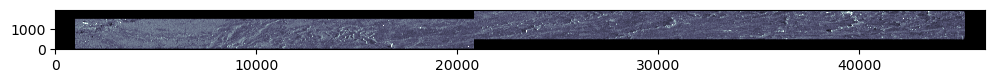

In [73]:
fix, ax = plt.subplots(figsize=(12, 2))
ax.imshow(np.abs(slc_iw12_m), vmin=0, vmax=250, cmap="bone", origin="lower")

In [74]:
np.unique(slc_iw12_m).shape

(603039,)

In [75]:
slc_iw1_vv_0.measurement.shape

(1500, 22541)

In [76]:
slc_iw2_vv_0.measurement.shape

(1511, 26345)

In [77]:
slc_iw1_vv_0.measurement

<xarray.DataArray 'measurement' (azimuth_time: 1500, slant_range_time: 22541)>
[33811500 values with dtype=complex64]
Coordinates:
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:17.85222...
  * slant_range_time  (slant_range_time) float64 0.005337 0.005337 ... 0.005687
Attributes: (12/36)
    AREA_OR_POINT:                       Area
    TIFFTAG_DATETIME:                    2023:11:17 18:07:01
    TIFFTAG_IMAGEDESCRIPTION:            Sentinel-1A IW SLC L1
    TIFFTAG_SOFTWARE:                    Sentinel-1 IPF 003.71
    family_name:                         SENTINEL-1
    number:                              A
    ...                                  ...
    geospatial_lat_min:                  46.88814312978376
    geospatial_lat_max:                  48.55283287540923
    geospatial_lon_min:                  4.910295135888662
    geospatial_lon_max:                  6.595963929007517
    units:                               1
    long_name:                           digital number

In [78]:
slc_iw2_vv_0.measurement

<xarray.DataArray 'measurement' (azimuth_time: 1511, slant_range_time: 26345)>
[39807295 values with dtype=complex64]
Coordinates:
  * azimuth_time      (azimuth_time) datetime64[ns] 2023-11-17T17:24:18.79366...
  * slant_range_time  (slant_range_time) float64 0.005646 0.005646 ... 0.006056
Attributes: (12/36)
    AREA_OR_POINT:                       Area
    TIFFTAG_DATETIME:                    2023:11:17 18:07:01
    TIFFTAG_IMAGEDESCRIPTION:            Sentinel-1A IW SLC L1
    TIFFTAG_SOFTWARE:                    Sentinel-1 IPF 003.71
    family_name:                         SENTINEL-1
    number:                              A
    ...                                  ...
    geospatial_lat_min:                  47.08756534955944
    geospatial_lat_max:                  48.74485508851042
    geospatial_lon_min:                  6.023131023591562
    geospatial_lon_max:                  7.706942050447679
    units:                               1
    long_name:                           digital number